In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [290]:
data="C:\\Users\\vidya\\Downloads\\sales-cars.csv"
df=pd.read_csv(data)
df.head()

,Month,Sales
0,2016-01,266
1,2016-02,146
2,2016-03,183
3,2016-04,119
4,2016-05,180


In [291]:
#making teh Month as date time and index it for dataframe
df["Month"]=pd.to_datetime(df["Month"])

In [292]:
type(df["Month"][0]) #its date time

pandas._libs.tslibs.timestamps.Timestamp

In [293]:
df.set_index("Month",inplace=True)
df.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [294]:
df.columns

Index(['Sales'], dtype='object')

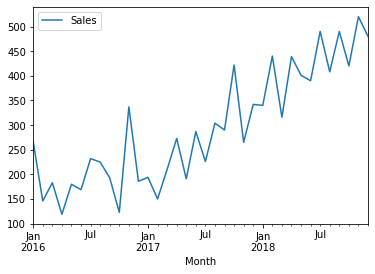

In [295]:
df.plot()

# differencing to make the TS stationary

In [296]:
sales_diff1=df["Sales"].diff(1).dropna()

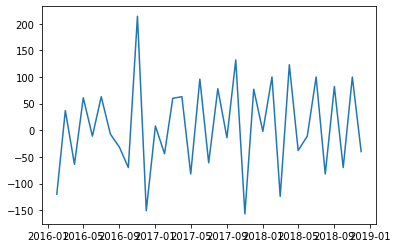

In [297]:
plt.plot(sales_diff1)

In [230]:
#acf and #pacf plots to checkthe values of p and q for ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

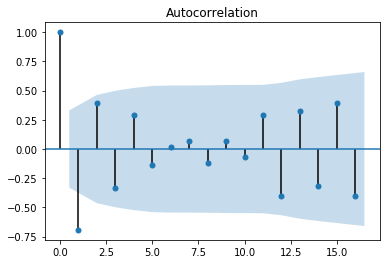

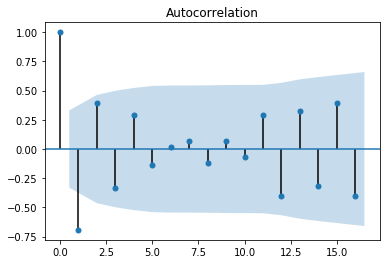

In [298]:
plot_acf(sales_diff1)  #p value of 1 will work as its outside of control interval

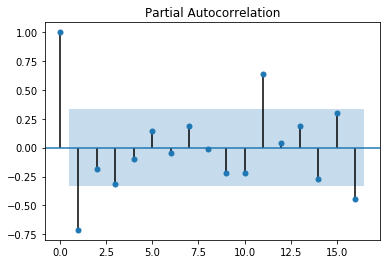

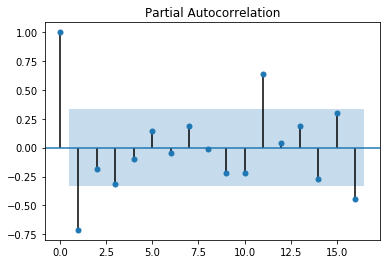

In [300]:
plot_pacf(sales_diff1)#q value of 1 will work asits outside the confidence interval.

In [233]:
#above plot shows that data is not stationary

In [234]:
df["Sales"].head()

Month
2016-01-01    266
2016-02-01    146
2016-03-01    183
2016-04-01    119
2016-05-01    180
Name: Sales, dtype: int64

In [236]:

df["Sales"].size

36

In [237]:
df["Sales"].dropna(inplace=True)

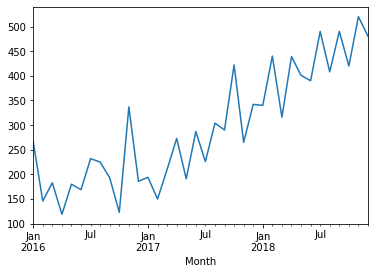

In [238]:
df["Sales"].plot()

In [ ]:
#dividing data in test and train
train=df[0:30]
test=df[30:36]

train.size,test.size

In [257]:
train

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180
2016-06-01,169
2016-07-01,232
2016-08-01,225
2016-09-01,193


# ARIMA 


In [258]:
import itertools
import warnings
warnings.filterwarnings("ignore")

In [325]:
p=d=q=range(0,9)
pdq=list(itertools.product(p,d,q))
#pdq

In [326]:
from statsmodels.tsa.arima_model import ARIMA
for parm in pdq:
    try:
        
        model=ARIMA(train,order=parm)
        model_fit= model.fit()
        pred=model_fit.forecast(steps=6)[0]
        print(parm,model_fit.aic)            
    except:
        continue

(0, 0, 1) 358.7147520026643
(0, 0, 2) 352.40061074093114
(0, 0, 3) nan
(0, 0, 4) 345.81598221937446
(0, 0, 5) nan
(0, 0, 6) 348.87572821861613
(0, 1, 1) 328.36880569535276
(0, 1, 2) 326.99267693421876
(0, 2, 1) 340.63504761081015
(1, 0, 0) 352.8797485892311
(1, 0, 1) 346.4587480583336
(1, 0, 2) 344.07813869717756
(1, 0, 4) 343.3734132041893
(1, 0, 5) 342.6573710685797
(1, 1, 0) 330.4499854931697
(1, 1, 1) 327.1826083478877
(1, 1, 2) 330.33665102927876
(1, 1, 3) 332.1751434999335
(1, 1, 4) 330.0165192074406
(1, 1, 5) 336.428330797983
(1, 1, 6) 329.27701387870866
(1, 1, 7) 331.0693341926659
(1, 1, 8) 332.8983074279887
(1, 2, 0) 341.2031296795733
(1, 2, 5) 326.5011037570667
(2, 0, 0) 343.55476404067963
(2, 0, 1) 344.7186631647321
(2, 0, 4) 359.70963390426584
(2, 1, 0) 331.31366328989236
(2, 1, 1) 329.44070261433757
(2, 1, 2) 330.41236800115564
(2, 1, 3) 333.8329700901454
(2, 1, 4) 330.7841919235025
(2, 2, 0) 339.65484205970586
(3, 0, 0) 345.35548258948904
(3, 0, 1) 369.57157616504475
(3, 

In [327]:
#the least AIC value is 
#(4, 1, 1) 323.61950617609284
model=ARIMA(train,order=(5,2,1))
model_fit= model.fit()
print(model_fit.aic)
pred=model_fit.forecast(steps=6)[0]
pred     

325.1450250195575


array([439.46881172, 473.15380777, 471.7347451 , 491.08091413,
       509.08842348, 537.55535103])

In [320]:
test.index,test.values

(DatetimeIndex(['2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
                '2018-11-01', '2018-12-01'],
               dtype='datetime64[ns]', name='Month', freq=None), array([[490],
        [408],
        [490],
        [420],
        [520],
        [480]], dtype=int64))

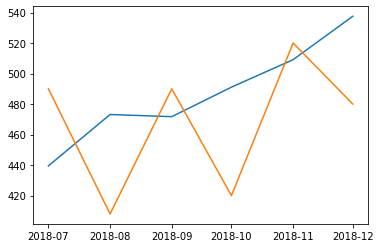

In [328]:
plt.plot(test.index,pred)
plt.plot(test)

In [330]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test,pred)

2602.7027466074037